In [26]:
from bs4 import BeautifulSoup
import time
import re
import requests
import random
import pickle
import numpy as np
import pandas as pd

In [7]:
# first_page = 'https://www.boxofficemojo.com/genres/chart/?view=main&sort=gross&order=DESC&pagenum=1&id=documentary.htm'
# last_page = 'https://www.boxofficemojo.com/genres/chart/?view=main&sort=gross&order=DESC&pagenum=18&id=documentary.htm'

first = 1
last = 18
lst_of_page_numbers = [ 'https://www.boxofficemojo.com/genres/chart/?view=main&sort=gross&order=DESC&pagenum=' 
                       +
                       str(x)
                       + 
                       '&id=documentary.htm' for x in range(first,last + 1)]
lst_of_page_numbers

['https://www.boxofficemojo.com/genres/chart/?view=main&sort=gross&order=DESC&pagenum=1&id=documentary.htm',
 'https://www.boxofficemojo.com/genres/chart/?view=main&sort=gross&order=DESC&pagenum=2&id=documentary.htm',
 'https://www.boxofficemojo.com/genres/chart/?view=main&sort=gross&order=DESC&pagenum=3&id=documentary.htm',
 'https://www.boxofficemojo.com/genres/chart/?view=main&sort=gross&order=DESC&pagenum=4&id=documentary.htm',
 'https://www.boxofficemojo.com/genres/chart/?view=main&sort=gross&order=DESC&pagenum=5&id=documentary.htm',
 'https://www.boxofficemojo.com/genres/chart/?view=main&sort=gross&order=DESC&pagenum=6&id=documentary.htm',
 'https://www.boxofficemojo.com/genres/chart/?view=main&sort=gross&order=DESC&pagenum=7&id=documentary.htm',
 'https://www.boxofficemojo.com/genres/chart/?view=main&sort=gross&order=DESC&pagenum=8&id=documentary.htm',
 'https://www.boxofficemojo.com/genres/chart/?view=main&sort=gross&order=DESC&pagenum=9&id=documentary.htm',
 'https://www.boxof

In [454]:
# Get list of pages across 4 categories:
h = 'rratedhorror' 
# to page 6
# id=romanticcomedy.htm to page 5
rc = 'romanticcomedy'
# id=animation.htm to page 6
a = 'animation'
# id=3d.html to page 4
t_d = '3d'

lst_of_page_numbers = []

base_string_1 = 'https://www.boxofficemojo.com/genres/chart/?view=main&sort=gross&order=DESC&pagenum='
base_string_2 = '&id='
base_string_3 = '.htm'

horror_len = 7
rom_com_len = 6
animation_len = 7
three_d_len = 5

for i in range(0, horror_len):
    lst_of_page_numbers.append(base_string_1 + str(i) + base_string_2 + h + base_string_3)

for i in range(0, rom_com_len):
    lst_of_page_numbers.append(base_string_1 + str(i) + base_string_2 + rc + base_string_3)

for i in range(0, animation_len):
    lst_of_page_numbers.append(base_string_1 + str(i) + base_string_2 + a + base_string_3)

for i in range(0, three_d_len):
    lst_of_page_numbers.append(base_string_1 + str(i) + base_string_2 + t_d + base_string_3)

    


In [453]:
lst_of_page_numbers

['https://www.boxofficemojo.com/genres/chart/?view=main&sort=gross&order=DESC&pagenum=0&id=rratedhorror.htm',
 'https://www.boxofficemojo.com/genres/chart/?view=main&sort=gross&order=DESC&pagenum=1&id=rratedhorror.htm',
 'https://www.boxofficemojo.com/genres/chart/?view=main&sort=gross&order=DESC&pagenum=2&id=rratedhorror.htm',
 'https://www.boxofficemojo.com/genres/chart/?view=main&sort=gross&order=DESC&pagenum=3&id=rratedhorror.htm',
 'https://www.boxofficemojo.com/genres/chart/?view=main&sort=gross&order=DESC&pagenum=4&id=rratedhorror.htm',
 'https://www.boxofficemojo.com/genres/chart/?view=main&sort=gross&order=DESC&pagenum=5&id=rratedhorror.htm',
 'https://www.boxofficemojo.com/genres/chart/?view=main&sort=gross&order=DESC&pagenum=6&id=rratedhorror.htm',
 'https://www.boxofficemojo.com/genres/chart/?view=main&sort=gross&order=DESC&pagenum=0&id=romanticcomedy.htm',
 'https://www.boxofficemojo.com/genres/chart/?view=main&sort=gross&order=DESC&pagenum=1&id=romanticcomedy.htm',
 'http

In [455]:
def getMovieLinks(lst_of_page_num):
    
    result = []
    
    for page in lst_of_page_num:
        
        response = requests.get(page)
        soup = BeautifulSoup(response.text, "lxml")
        movie_urls = soup.findAll('a', href=re.compile("movies"))
        
        for link in movie_urls:
#             if 'https://www.boxofficemojo.com/movies/?id=' in link:
                result.append('https://www.boxofficemojo.com' + link['href'])
                print(result)
    return list(set(result))

In [456]:
list_of_movies = getMovieLinks(lst_of_page_numbers)
with open('list_of_movies.pkl', 'wb') as f:
    pickle.dump(list_of_movies, f)

['https://www.boxofficemojo.com/movies/?id=universalevent2019.htm']
['https://www.boxofficemojo.com/movies/?id=universalevent2019.htm', 'https://www.boxofficemojo.com/movies/?id=it.htm']
['https://www.boxofficemojo.com/movies/?id=universalevent2019.htm', 'https://www.boxofficemojo.com/movies/?id=it.htm', 'https://www.boxofficemojo.com/movies/?id=exorcist.htm']
['https://www.boxofficemojo.com/movies/?id=universalevent2019.htm', 'https://www.boxofficemojo.com/movies/?id=it.htm', 'https://www.boxofficemojo.com/movies/?id=exorcist.htm', 'https://www.boxofficemojo.com/movies/?id=blumhouse2.htm']
['https://www.boxofficemojo.com/movies/?id=universalevent2019.htm', 'https://www.boxofficemojo.com/movies/?id=it.htm', 'https://www.boxofficemojo.com/movies/?id=exorcist.htm', 'https://www.boxofficemojo.com/movies/?id=blumhouse2.htm', 'https://www.boxofficemojo.com/movies/?id=halloween2018.htm']
['https://www.boxofficemojo.com/movies/?id=universalevent2019.htm', 'https://www.boxofficemojo.com/movies

['https://www.boxofficemojo.com/movies/?id=universalevent2019.htm', 'https://www.boxofficemojo.com/movies/?id=it.htm', 'https://www.boxofficemojo.com/movies/?id=exorcist.htm', 'https://www.boxofficemojo.com/movies/?id=blumhouse2.htm', 'https://www.boxofficemojo.com/movies/?id=halloween2018.htm', 'https://www.boxofficemojo.com/movies/?id=blairwitchproject.htm', 'https://www.boxofficemojo.com/movies/?id=conjuring.htm', 'https://www.boxofficemojo.com/movies/?id=thenun.htm', 'https://www.boxofficemojo.com/movies/?id=paranormalactivity.htm', 'https://www.boxofficemojo.com/movies/?id=interviewwiththevampire.htm', 'https://www.boxofficemojo.com/movies/?id=paranormalactivity3.htm', 'https://www.boxofficemojo.com/movies/?id=scream.htm', 'https://www.boxofficemojo.com/movies/?id=conjuring2.htm', 'https://www.boxofficemojo.com/movies/?id=annabelle2.htm', 'https://www.boxofficemojo.com/movies/?id=scream2.htm', 'https://www.boxofficemojo.com/movies/?id=sleepyhollow.htm', 'https://www.boxofficemojo.

['https://www.boxofficemojo.com/movies/?id=universalevent2019.htm', 'https://www.boxofficemojo.com/movies/?id=it.htm', 'https://www.boxofficemojo.com/movies/?id=exorcist.htm', 'https://www.boxofficemojo.com/movies/?id=blumhouse2.htm', 'https://www.boxofficemojo.com/movies/?id=halloween2018.htm', 'https://www.boxofficemojo.com/movies/?id=blairwitchproject.htm', 'https://www.boxofficemojo.com/movies/?id=conjuring.htm', 'https://www.boxofficemojo.com/movies/?id=thenun.htm', 'https://www.boxofficemojo.com/movies/?id=paranormalactivity.htm', 'https://www.boxofficemojo.com/movies/?id=interviewwiththevampire.htm', 'https://www.boxofficemojo.com/movies/?id=paranormalactivity3.htm', 'https://www.boxofficemojo.com/movies/?id=scream.htm', 'https://www.boxofficemojo.com/movies/?id=conjuring2.htm', 'https://www.boxofficemojo.com/movies/?id=annabelle2.htm', 'https://www.boxofficemojo.com/movies/?id=scream2.htm', 'https://www.boxofficemojo.com/movies/?id=sleepyhollow.htm', 'https://www.boxofficemojo.

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




['https://www.boxofficemojo.com/movies/?id=universalevent2019.htm', 'https://www.boxofficemojo.com/movies/?id=it.htm', 'https://www.boxofficemojo.com/movies/?id=exorcist.htm', 'https://www.boxofficemojo.com/movies/?id=blumhouse2.htm', 'https://www.boxofficemojo.com/movies/?id=halloween2018.htm', 'https://www.boxofficemojo.com/movies/?id=blairwitchproject.htm', 'https://www.boxofficemojo.com/movies/?id=conjuring.htm', 'https://www.boxofficemojo.com/movies/?id=thenun.htm', 'https://www.boxofficemojo.com/movies/?id=paranormalactivity.htm', 'https://www.boxofficemojo.com/movies/?id=interviewwiththevampire.htm', 'https://www.boxofficemojo.com/movies/?id=paranormalactivity3.htm', 'https://www.boxofficemojo.com/movies/?id=scream.htm', 'https://www.boxofficemojo.com/movies/?id=conjuring2.htm', 'https://www.boxofficemojo.com/movies/?id=annabelle2.htm', 'https://www.boxofficemojo.com/movies/?id=scream2.htm', 'https://www.boxofficemojo.com/movies/?id=sleepyhollow.htm', 'https://www.boxofficemojo

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [457]:
# Checking the frequency of links to make sure I am not scraping duplicates
from collections import defaultdict
from pprint import pprint
x = defaultdict(int)

for y in list_of_movies:
    x[y] += 1

pprint(sorted(x.values()))
print(len(x.values()))



[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [458]:
test_url = 'https://www.boxofficemojo.com/movies/?id=beyondbarbedwire.htm'
# 'https://www.boxofficemojo.com/movies/?id=beyondbarbedwire.htm'
response = requests.get(list_of_movies[0])
print(response.status_code)
movie_soup = BeautifulSoup(response.text, "lxml")

200


In [459]:
movie_name = movie_soup.findAll('b')[1].text
table_element = movie_soup.findAll('tr')[5]

# dom_tot_gross = table_element.findAll('td')[1:][0].text.split(': ')[1]
# dist = table_element.findAll('td')[1:][1].text.split(': ')[1]
# genre = table_element.findAll('td')[1:][2].text.split(': ')[1]
# release_date = table_element.findAll('td')[1:][3].text.split(': ')[1]
# runtime = table_element.findAll('td')[1:][4].text.split(': ')[1]
# rating = table_element.findAll('td')[1:][5].text.split(': ')[1]
# prod_budget = table_element.findAll('td')[1:][6].text.split(': ')[1]

# [dom_tot_gross, dist, genre, release_date, runtime, rating, prod_budget]
# dom_tot_gross
# table_element.findAll(text=re.findall(''))
table_element

<tr><td>
<center><table bgcolor="#dcdcdc" border="0" cellpadding="4" cellspacing="1" width="95%"><tr bgcolor="#ffffff"><td align="center" colspan="2"><font size="4">Domestic Total Gross: <b>$7,802,450</b></font></td></tr><tr bgcolor="#ffffff"><td valign="top">Distributor: <b><a href="/studio/chart/?studio=universal.htm">Universal</a></b></td><td valign="top">Release Date: <b><nobr><a href="/schedule/?view=bydate&amp;release=theatrical&amp;date=2006-03-31&amp;p=.htm">March 31, 2006</a></nobr></b></td></tr><tr bgcolor="#ffffff"><td valign="top">Genre: <b>Sci-Fi Horror</b></td><td valign="top">Runtime: <b>1 hrs. 36 min.</b></td></tr><tr bgcolor="#ffffff"><td valign="top">MPAA Rating: <b>R</b></td><td valign="top">Production Budget: <b>$15 million</b></td></tr></table> </center></td>
</tr>

In [34]:
!pip install fake_useragent

In [460]:
from fake_useragent import UserAgent
ua = UserAgent()
# Writing a function to loop through these links and extract the relevant data
def getMovieData(movieUrl):
    headers = {'User-Agent': ua.random}
    response = requests.get(movieUrl, headers)
    global counter
#     print(response.status_code)

    movie_soup = BeautifulSoup(response.text) 
    
    try:
        table_element = movie_soup.findAll('tr')[5]
    except :
        table_element = None
        counter += 1
    
#     if table_element == None:
#         counter += 1
    
    try:
        movie_name = movie_soup.findAll('b')[1].text
    except:
        movie_name = None
    
    try:
        dom_tot_gross = table_element.findAll('td')[1:][0].text.split(': ')[1]
    except:
        dom_tot_gross = None
        
    try:
        dist = table_element.findAll('td')[1:][1].text.split(': ')[1]
    except:
        dist = None
        
    try:
        genre = table_element.findAll('td')[1:][2].text.split(': ')[1]
    except:
        genre = None
        
    try:
        release_date = table_element.findAll('td')[1:][3].text.split(': ')[1]
    except:
        release_date = None
        
    try:
        runtime = table_element.findAll('td')[1:][4].text.split(': ')[1]
    except:
        runtime = None
        
    try:
        rating = table_element.findAll('td')[1:][5].text.split(': ')[1]
    except:
        rating = None

    try:
        prod_budget = table_element.findAll('td')[1:][6].text.split(': ')[1]
    except:
        prod_budget = None
    
#     timeDelay = random.randrange(2000, 4000)/1000
#     time.sleep(timeDelay)   

#     print("Scraped " + str(link)) 
#     print("Waited " + str(timeDelay))
    return [movie_name, dom_tot_gross, dist, genre, release_date, runtime, rating, prod_budget]

In [461]:
# Scrape each movie page and append to movie_data list:
movie_data = []
counter = 0
for idx, link in enumerate(list_of_movies):
    movie_data.append(getMovieData(link))
    print("Scraped " + str(idx) + ". " + str(link))
print(counter)

Scraped 0. https://www.boxofficemojo.com/movies/?id=slither.htm
Scraped 1. https://www.boxofficemojo.com/movies/?id=relic.htm
Scraped 2. https://www.boxofficemojo.com/movies/?id=pippilongstocking.htm
Scraped 3. https://www.boxofficemojo.com/movies/?id=sheepwolves.htm
Scraped 4. https://www.boxofficemojo.com/movies/?id=strictlybusiness.htm
Scraped 5. https://www.boxofficemojo.com/movies/?id=hobbit3.htm
Scraped 6. https://www.boxofficemojo.com/movies/?id=pixar22a.htm
Scraped 7. https://www.boxofficemojo.com/movies/?id=howhefellinlove.htm
Scraped 8. https://www.boxofficemojo.com/movies/?id=jackass3d.htm
Scraped 9. https://www.boxofficemojo.com/movies/?id=aquateenhungerforce.htm
Scraped 10. https://www.boxofficemojo.com/movies/?id=lastairbender.htm
Scraped 11. https://www.boxofficemojo.com/movies/?id=amityvillehorror05.htm
Scraped 12. https://www.boxofficemojo.com/movies/?id=bloodthelastvampire.htm
Scraped 13. https://www.boxofficemojo.com/movies/?id=husbandsandwives.htm
Scraped 14. https:

Scraped 117. https://www.boxofficemojo.com/movies/?id=dracula2000.htm
Scraped 118. https://www.boxofficemojo.com/movies/?id=finaldestination2.htm
Scraped 119. https://www.boxofficemojo.com/movies/?id=funhouse.htm
Scraped 120. https://www.boxofficemojo.com/movies/?id=ghostship.htm
Scraped 121. https://www.boxofficemojo.com/movies/?id=steamboy.htm
Scraped 122. https://www.boxofficemojo.com/movies/?id=jetsonsthemovie.htm
Scraped 123. https://www.boxofficemojo.com/movies/?id=haveaniceday.htm
Scraped 124. https://www.boxofficemojo.com/movies/?id=alongcamepolly.htm
Scraped 125. https://www.boxofficemojo.com/movies/?id=lordsofsalem.htm
Scraped 126. https://www.boxofficemojo.com/movies/?id=oz.htm
Scraped 127. https://www.boxofficemojo.com/movies/?id=graveyardshift.htm
Scraped 128. https://www.boxofficemojo.com/movies/?id=wallisandgromit.htm
Scraped 129. https://www.boxofficemojo.com/movies/?id=castleinthesky2018.htm
Scraped 130. https://www.boxofficemojo.com/movies/?id=avatar5.htm
Scraped 131.

Scraped 232. https://www.boxofficemojo.com/movies/?id=sinister.htm
Scraped 233. https://www.boxofficemojo.com/movies/?id=houseof1000corpses.htm
Scraped 234. https://www.boxofficemojo.com/movies/?id=1998bugsbunnyfilmfestival.htm
Scraped 235. https://www.boxofficemojo.com/movies/?id=kuboandthetwostrings.htm
Scraped 236. https://www.boxofficemojo.com/movies/?id=planetbboy3d.htm
Scraped 237. https://www.boxofficemojo.com/movies/?id=islandoflemurs.htm
Scraped 238. https://www.boxofficemojo.com/movies/?id=underworld5.htm
Scraped 239. https://www.boxofficemojo.com/movies/?id=frankenweenie.htm
Scraped 240. https://www.boxofficemojo.com/movies/?id=dansunegalaxiepresdechezvous.htm
Scraped 241. https://www.boxofficemojo.com/movies/?id=kettleoffish.htm
Scraped 242. https://www.boxofficemojo.com/movies/?id=cloudy2.htm
Scraped 243. https://www.boxofficemojo.com/movies/?id=pixar2015.htm
Scraped 244. https://www.boxofficemojo.com/movies/?id=orphan09.htm
Scraped 245. https://www.boxofficemojo.com/movie

Scraped 348. https://www.boxofficemojo.com/movies/?id=miaandthemigoo.htm
Scraped 349. https://www.boxofficemojo.com/movies/?id=raw2017.htm
Scraped 350. https://www.boxofficemojo.com/movies/?id=illumination2015.htm
Scraped 351. https://www.boxofficemojo.com/movies/?id=mysticpizza.htm
Scraped 352. https://www.boxofficemojo.com/movies/?id=headspace.htm
Scraped 353. https://www.boxofficemojo.com/movies/?id=dolphinsandwhales3d.htm
Scraped 354. https://www.boxofficemojo.com/movies/?id=goodyear.htm
Scraped 355. https://www.boxofficemojo.com/movies/?id=howtotrainyourdragon.htm
Scraped 356. https://www.boxofficemojo.com/movies/?id=starchaserthelegendoforin.htm
Scraped 357. https://www.boxofficemojo.com/movies/?id=silverliningsplaybook.htm
Scraped 358. https://www.boxofficemojo.com/movies/?id=turbo.htm
Scraped 359. https://www.boxofficemojo.com/movies/?id=paranorman.htm
Scraped 360. https://www.boxofficemojo.com/movies/?id=ant-manandthewasp.htm
Scraped 361. https://www.boxofficemojo.com/movies/?

Scraped 464. https://www.boxofficemojo.com/movies/?id=mybloodyvalentine09.htm
Scraped 465. https://www.boxofficemojo.com/movies/?id=anastasia.htm
Scraped 466. https://www.boxofficemojo.com/movies/?id=everybodywantstobeitalian.htm
Scraped 467. https://www.boxofficemojo.com/movies/?id=dominion.htm
Scraped 468. https://www.boxofficemojo.com/movies/?id=sixdayssevennights.htm
Scraped 469. https://www.boxofficemojo.com/movies/?id=midnightmeattrain.htm
Scraped 470. https://www.boxofficemojo.com/movies/?id=shrek4.htm
Scraped 471. https://www.boxofficemojo.com/movies/?id=adventuresofmarktwain.htm
Scraped 472. https://www.boxofficemojo.com/movies/?id=shadowofthevampire.htm
Scraped 473. https://www.boxofficemojo.com/movies/?id=27dresses.htm
Scraped 474. https://www.boxofficemojo.com/movies/?id=thejunglebunch.htm
Scraped 475. https://www.boxofficemojo.com/movies/?id=cars2.htm
Scraped 476. https://www.boxofficemojo.com/movies/?id=ferngullythelastrainforest.htm
Scraped 477. https://www.boxofficemojo

Scraped 580. https://www.boxofficemojo.com/movies/?id=holiday.htm
Scraped 581. https://www.boxofficemojo.com/movies/?id=forloveormoney.htm
Scraped 582. https://www.boxofficemojo.com/movies/?id=splice.htm
Scraped 583. https://www.boxofficemojo.com/movies/?id=whatmenwant.htm
Scraped 584. https://www.boxofficemojo.com/movies/?id=montecarlo.htm
Scraped 585. https://www.boxofficemojo.com/movies/?id=fineromance.htm
Scraped 586. https://www.boxofficemojo.com/movies/?id=digimonloss.htm
Scraped 587. https://www.boxofficemojo.com/movies/?id=treasureof4crowns.htm
Scraped 588. https://www.boxofficemojo.com/movies/?id=threemusketeers11.htm
Scraped 589. https://www.boxofficemojo.com/movies/?id=freddieasfro7.htm
Scraped 590. https://www.boxofficemojo.com/movies/?id=friday13th7.htm
Scraped 591. https://www.boxofficemojo.com/movies/?id=gladiatorsofrome.htm
Scraped 592. https://www.boxofficemojo.com/movies/?id=southpark.htm
Scraped 593. https://www.boxofficemojo.com/movies/?id=venom2018.htm
Scraped 594.

Scraped 696. https://www.boxofficemojo.com/movies/?id=shessolovely.htm
Scraped 697. https://www.boxofficemojo.com/movies/?id=ghostintheshell2017.htm
Scraped 698. https://www.boxofficemojo.com/movies/?id=boattrip.htm
Scraped 699. https://www.boxofficemojo.com/movies/?id=clashofthetitans10.htm
Scraped 700. https://www.boxofficemojo.com/movies/?id=secretofnimh.htm
Scraped 701. https://www.boxofficemojo.com/movies/?id=firsttime.htm
Scraped 702. https://www.boxofficemojo.com/movies/?id=uglytruth.htm
Scraped 703. https://www.boxofficemojo.com/movies/?id=area51.htm
Scraped 704. https://www.boxofficemojo.com/movies/?id=bigwedding.htm
Scraped 705. https://www.boxofficemojo.com/movies/?id=queentoplay.htm
Scraped 706. https://www.boxofficemojo.com/movies/?id=warneranimated2019.htm
Scraped 707. https://www.boxofficemojo.com/movies/?id=abouttime.htm
Scraped 708. https://www.boxofficemojo.com/movies/?id=amysorgasm.htm
Scraped 709. https://www.boxofficemojo.com/movies/?id=amandajack.htm
Scraped 710. 

Scraped 813. https://www.boxofficemojo.com/movies/?id=wakingupinreno.htm
Scraped 814. https://www.boxofficemojo.com/movies/?id=untitledanimatedentertainmentstudios.htm
Scraped 815. https://www.boxofficemojo.com/movies/?id=friday13th.htm
Scraped 816. https://www.boxofficemojo.com/movies/?id=blackwatersofechospond.htm
Scraped 817. https://www.boxofficemojo.com/movies/?id=blinddating.htm
Scraped 818. https://www.boxofficemojo.com/movies/?id=dolphintale.htm
Scraped 819. https://www.boxofficemojo.com/movies/?id=wall-e.htm
Scraped 820. https://www.boxofficemojo.com/movies/?id=arthur2011.htm
Scraped 821. https://www.boxofficemojo.com/movies/?id=anythingelse.htm
Scraped 822. https://www.boxofficemojo.com/movies/?id=acatinparis.htm
Scraped 823. https://www.boxofficemojo.com/movies/?id=lord2016.htm
Scraped 824. https://www.boxofficemojo.com/movies/?id=punchdrunklove.htm
Scraped 825. https://www.boxofficemojo.com/movies/?id=grace09.htm
Scraped 826. https://www.boxofficemojo.com/movies/?id=hard10.

Scraped 931. https://www.boxofficemojo.com/movies/?id=winadatewithtadhamilton.htm
Scraped 932. https://www.boxofficemojo.com/movies/?id=wbanimation21.htm
Scraped 933. https://www.boxofficemojo.com/movies/?id=anohana.htm
Scraped 934. https://www.boxofficemojo.com/movies/?id=metalstorm.htm
Scraped 935. https://www.boxofficemojo.com/movies/?id=heidissong.htm
Scraped 936. https://www.boxofficemojo.com/movies/?id=myfirstwedding.htm
Scraped 937. https://www.boxofficemojo.com/movies/?id=goosebumps.htm
Scraped 938. https://www.boxofficemojo.com/movies/?id=vacancy.htm
Scraped 939. https://www.boxofficemojo.com/movies/?id=virus.htm
Scraped 940. https://www.boxofficemojo.com/movies/?id=paprika.htm
Scraped 941. https://www.boxofficemojo.com/movies/?id=pixar22b.htm
Scraped 942. https://www.boxofficemojo.com/movies/?id=talesfromthedarkside.htm
Scraped 943. https://www.boxofficemojo.com/movies/?id=hellraiser3.htm
Scraped 944. https://www.boxofficemojo.com/movies/?id=nightisshortwalkongirl.htm
Scraped

Scraped 1046. https://www.boxofficemojo.com/movies/?id=storks.htm
Scraped 1047. https://www.boxofficemojo.com/movies/?id=maximumoverdrive.htm
Scraped 1048. https://www.boxofficemojo.com/movies/?id=almostinlove.htm
Scraped 1049. https://www.boxofficemojo.com/movies/?id=lupincastleofcagliostro.htm
Scraped 1050. https://www.boxofficemojo.com/movies/?id=deathhouse.htm
Scraped 1051. https://www.boxofficemojo.com/movies/?id=babarthemovie.htm
Scraped 1052. https://www.boxofficemojo.com/movies/?id=untitleddisneyfairytalela.htm
Scraped 1053. https://www.boxofficemojo.com/movies/?id=tcmbeginning.htm
Scraped 1054. https://www.boxofficemojo.com/movies/?id=sprung.htm
Scraped 1055. https://www.boxofficemojo.com/movies/?id=classof1999.htm
Scraped 1056. https://www.boxofficemojo.com/movies/?id=texaschainsaw3.htm
Scraped 1057. https://www.boxofficemojo.com/movies/?id=theprophet.htm
Scraped 1058. https://www.boxofficemojo.com/movies/?id=illumination2018.htm
Scraped 1059. https://www.boxofficemojo.com/mo

Scraped 1160. https://www.boxofficemojo.com/movies/?id=captainsabertooth.htm
Scraped 1161. https://www.boxofficemojo.com/movies/?id=collector09.htm
Scraped 1162. https://www.boxofficemojo.com/movies/?id=onepiecefilmgold.htm
Scraped 1163. https://www.boxofficemojo.com/movies/?id=blackcoatsdaughter.htm
Scraped 1164. https://www.boxofficemojo.com/movies/?id=devilsrejects.htm
Scraped 1165. https://www.boxofficemojo.com/movies/?id=anythingforalice.htm
Scraped 1166. https://www.boxofficemojo.com/movies/?id=superman2012.htm
Scraped 1167. https://www.boxofficemojo.com/movies/?id=girlonabicycle.htm
Scraped 1168. https://www.boxofficemojo.com/movies/?id=shark3d.htm
Scraped 1169. https://www.boxofficemojo.com/movies/?id=bittermoon.htm
Scraped 1170. https://www.boxofficemojo.com/movies/?id=undertheelectricsky.htm
Scraped 1171. https://www.boxofficemojo.com/movies/?id=trumpetoftheswam.htm
Scraped 1172. https://www.boxofficemojo.com/movies/?id=driveangry.htm
Scraped 1173. https://www.boxofficemojo.c

Scraped 1273. https://www.boxofficemojo.com/movies/?id=hoteldelove.htm
Scraped 1274. https://www.boxofficemojo.com/movies/?id=videodrome.htm
Scraped 1275. https://www.boxofficemojo.com/movies/?id=tintin.htm
Scraped 1276. https://www.boxofficemojo.com/movies/?id=bramstokersdracula.htm
Scraped 1277. https://www.boxofficemojo.com/movies/?id=igor.htm
Scraped 1278. https://www.boxofficemojo.com/movies/?id=roadtoninja.htm
Scraped 1279. https://www.boxofficemojo.com/movies/?id=blazingsamurai.htm
Scraped 1280. https://www.boxofficemojo.com/movies/?id=houseofwax.htm
Scraped 1281. https://www.boxofficemojo.com/movies/?id=housesitter.htm
Scraped 1282. https://www.boxofficemojo.com/movies/?id=airracers.htm
Scraped 1283. https://www.boxofficemojo.com/movies/?id=purpleroseofcairo.htm
Scraped 1284. https://www.boxofficemojo.com/movies/?id=sherlockgnomes.htm
Scraped 1285. https://www.boxofficemojo.com/movies/?id=delhisafari.htm
Scraped 1286. https://www.boxofficemojo.com/movies/?id=meettherobinsons.ht

Scraped 1386. https://www.boxofficemojo.com/movies/?id=trickortreaters.htm
Scraped 1387. https://www.boxofficemojo.com/movies/?id=digimoncoexistence.htm
Scraped 1388. https://www.boxofficemojo.com/movies/?id=puellamagi.htm
Scraped 1389. https://www.boxofficemojo.com/movies/?id=leprechaun2.htm
Scraped 1390. https://www.boxofficemojo.com/movies/?id=stillbreathing.htm
Scraped 1391. https://www.boxofficemojo.com/movies/?id=mybestfriendswedding.htm
Scraped 1392. https://www.boxofficemojo.com/movies/?id=mickiandmaude.htm
Scraped 1393. https://www.boxofficemojo.com/movies/?id=goofymovie.htm
Scraped 1394. https://www.boxofficemojo.com/movies/?id=justtheticket.htm
Scraped 1395. https://www.boxofficemojo.com/movies/?id=howtoloseaguyin10days.htm
Scraped 1396. https://www.boxofficemojo.com/movies/?id=justakiss.htm
Scraped 1397. https://www.boxofficemojo.com/movies/?id=pompoko2018.htm
Scraped 1398. https://www.boxofficemojo.com/movies/?id=finalfantasy.htm
Scraped 1399. https://www.boxofficemojo.com

Scraped 1500. https://www.boxofficemojo.com/movies/?id=valentine.htm
Scraped 1501. https://www.boxofficemojo.com/movies/?id=halloween07.htm
Scraped 1502. https://www.boxofficemojo.com/movies/?id=quarantine.htm
Scraped 1503. https://www.boxofficemojo.com/movies/?id=luisthealiens.htm
Scraped 1504. https://www.boxofficemojo.com/movies/?id=elmst.htm
Scraped 1505. https://www.boxofficemojo.com/movies/?id=swordartonline.htm
Scraped 1506. https://www.boxofficemojo.com/movies/?id=rise.htm
Scraped 1507. https://www.boxofficemojo.com/movies/?id=murphysromance.htm
Scraped 1508. https://www.boxofficemojo.com/movies/?id=arthur.htm
Scraped 1509. https://www.boxofficemojo.com/movies/?id=tmnt2013.htm
Scraped 1510. https://www.boxofficemojo.com/movies/?id=species2.htm
Scraped 1511. https://www.boxofficemojo.com/movies/?id=osmosisjones.htm
Scraped 1512. https://www.boxofficemojo.com/movies/?id=beauticianandthebeast.htm
Scraped 1513. https://www.boxofficemojo.com/movies/?id=pokemon2.htm
Scraped 1514. htt

Scraped 1614. https://www.boxofficemojo.com/movies/?id=kungfupanda3.htm
Scraped 1615. https://www.boxofficemojo.com/movies/?id=nosmallaffair.htm
Scraped 1616. https://www.boxofficemojo.com/movies/?id=psycho3.htm
Scraped 1617. https://www.boxofficemojo.com/movies/?id=wbeventfilmiii19.htm
Scraped 1618. https://www.boxofficemojo.com/movies/?id=matchmaker.htm
Scraped 1619. https://www.boxofficemojo.com/movies/?id=mimic.htm
Scraped 1620. https://www.boxofficemojo.com/movies/?id=greatwall.htm
Scraped 1621. https://www.boxofficemojo.com/movies/?id=rubysparks.htm
Scraped 1622. https://www.boxofficemojo.com/movies/?id=runawaybride.htm
Scraped 1623. https://www.boxofficemojo.com/movies/?id=spykids3.htm
Scraped 1624. https://www.boxofficemojo.com/movies/?id=slumberpartymassacre3.htm
Scraped 1625. https://www.boxofficemojo.com/movies/?id=leothelion.htm
Scraped 1626. https://www.boxofficemojo.com/movies/?id=sexandzen3d.htm
Scraped 1627. https://www.boxofficemojo.com/movies/?id=abeginnersguidetosnuf

Scraped 1728. https://www.boxofficemojo.com/movies/?id=sailormoonsupers.htm
Scraped 1729. https://www.boxofficemojo.com/movies/?id=rugrats2020.htm
Scraped 1730. https://www.boxofficemojo.com/movies/?id=jewtopia.htm
Scraped 1731. https://www.boxofficemojo.com/movies/?id=snakesonaplane.htm
Scraped 1732. https://www.boxofficemojo.com/movies/?id=dorfmaninlove.htm
Scraped 1733. https://www.boxofficemojo.com/movies/?id=jonasbros3dconcert.htm
Scraped 1734. https://www.boxofficemojo.com/movies/?id=chickenrun.htm
Scraped 1735. https://www.boxofficemojo.com/movies/?id=mylifeasazucchini.htm
Scraped 1736. https://www.boxofficemojo.com/movies/?id=thesecondtimearound.htm
Scraped 1737. https://www.boxofficemojo.com/movies/?id=americandreamer.htm
Scraped 1738. https://www.boxofficemojo.com/movies/?id=tencommandments07.htm
Scraped 1739. https://www.boxofficemojo.com/movies/?id=alphaandomega.htm
Scraped 1740. https://www.boxofficemojo.com/movies/?id=kindred.htm
Scraped 1741. https://www.boxofficemojo.co

Scraped 1842. https://www.boxofficemojo.com/movies/?id=mrwonderful.htm
Scraped 1843. https://www.boxofficemojo.com/movies/?id=arrietty.htm
Scraped 1844. https://www.boxofficemojo.com/movies/?id=clueless.htm
Scraped 1845. https://www.boxofficemojo.com/movies/?id=clashofthetitans2.htm
Scraped 1846. https://www.boxofficemojo.com/movies/?id=guardians.htm
Scraped 1847. https://www.boxofficemojo.com/movies/?id=imarriedastrangeperson.htm
Scraped 1848. https://www.boxofficemojo.com/movies/?id=marvel14b.htm
Scraped 1849. https://www.boxofficemojo.com/movies/?id=sabrina.htm
Scraped 1850. https://www.boxofficemojo.com/movies/?id=fromuponpoppyhill.htm
Scraped 1851. https://www.boxofficemojo.com/movies/?id=ferdinand.htm
Scraped 1852. https://www.boxofficemojo.com/movies/?id=halloween8.htm
Scraped 1853. https://www.boxofficemojo.com/movies/?id=troublewithbliss.htm
Scraped 1854. https://www.boxofficemojo.com/movies/?id=happytogether90.htm
Scraped 1855. https://www.boxofficemojo.com/movies/?id=geostor

In [462]:
with open('scraped_movies_bom.pkl', 'wb') as f:
    pickle.dump(movie_data, f)

In [463]:
# Add 'opening_wknd_gross', 'widest_release', 'close_date', 'in_release'
bom_pickle = pd.read_pickle('/Users/joe.kholodenko/nyc19_ds18/scrap_folder/scraped_movies_bom.pkl')
bom_df = pd.DataFrame(bom_pickle, columns = ['movie_name', 'dom_tot_gross', 'dist', 'release_date', 'genre', 'runtime', 'rating', 'prod_budget'])
bom_df.head()

movie_name           dom_tot_gross           dist      release_date  \
0            Slither              $7,802,450      Universal    March 31, 2006   
1          The Relic             $33,956,608      Paramount  January 10, 1997   
2               None                    None           None              None   
3     Sheep & Wolves  Vertical Entertainment  March 9, 2018         Animation   
4  Strictly Business              $7,683,267   Warner Bros.  November 8, 1991   

             genre         runtime rating  prod_budget  
0    Sci-Fi Horror  1 hrs. 36 min.      R  $15 million  
1           Horror  1 hrs. 49 min.      R          N/A  
2             None            None   None         None  
3   1 hrs. 25 min.              PG    N/A         None  
4  Romantic Comedy  1 hrs. 23 min.  PG-13          N/A

In [464]:
with open('bom_movies_to_df.pkl', 'wb') as f:
    pickle.dump(bom_df, f)

In [467]:
# Convert columns that are strings but should be numeric
bom_df['dom_tot_gross'] = pd.to_numeric(bom_df['dom_tot_gross'].replace(re.compile("[^0-9]"), ""))
bom_df['prod_budget'] = pd.to_numeric(bom_df['prod_budget'].replace(re.compile("[^0-9]"), ""))
# df['worldwide_gross'] = pd.to_numeric(df['worldwide_gross'].replace(re.compile("[^0-9]"), ""))

In [468]:
bom_df['prod_budget'].sort_values()

503     2.0
1800    3.0
232     3.0
466     3.0
1448    3.0
1538    3.0
1062    4.0
53      4.0
1145    5.0
430     5.0
542     5.0
808     5.0
1069    5.0
1294    5.0
1591    5.0
455     5.0
1769    6.0
320     6.0
1781    6.0
1788    6.0
1001    7.0
1164    7.0
179     8.0
1783    8.0
285     8.0
1574    8.0
97      8.0
1464    8.0
1031    8.0
1369    8.0
       ... 
1839    NaN
1841    NaN
1842    NaN
1843    NaN
1844    NaN
1849    NaN
1850    NaN
1853    NaN
1854    NaN
1857    NaN
1858    NaN
1859    NaN
1860    NaN
1862    NaN
1863    NaN
1865    NaN
1866    NaN
1867    NaN
1869    NaN
1870    NaN
1872    NaN
1875    NaN
1876    NaN
1877    NaN
1878    NaN
1882    NaN
1884    NaN
1885    NaN
1886    NaN
1887    NaN
Name: prod_budget, Length: 1888, dtype: float64

In [94]:
with open('movie_data_df.pkl', 'wb') as f:
    pickle.dump(df, f)

In [58]:
# Seems to be a lot of missing production budget details from BoxOfficeMojo
# This is an attempt to fill that in using data from www.the-numbers.com

base_url = 'https://www.the-numbers.com/movie/budgets/all/'

pages = [base_url + str(x) for x in range(1, 5602, 100)]
    

In [59]:
def tnMatrix(lst_of_pages):
    the_numbers_data_1 = []
    the_numbers_data_2 = []  
    
    for link in lst_of_pages:
        response_tn = requests.get(link, 'lxml')
        soup = BeautifulSoup(response_tn.text, "lxml")
        
        result = soup.findAll('td')

        for x in result:
            the_numbers_data_1.append(x.text)    
        
        while len(the_numbers_data_1) != 0:
            the_numbers_data_2.append(the_numbers_data_1[0:6])
            the_numbers_data_1 = the_numbers_data_1[6:]
            
        timeDelay = random.randrange(2000, 4000)/1000
        time.sleep(timeDelay)   
    
        print("Scraped " + str(link)) 
        print("Waited " + str(timeDelay))
        
    return the_numbers_data_2

In [354]:
test = tnMatrix(pages)

Scraped https://www.the-numbers.com/movie/budgets/all/1
Waited 3.236
Scraped https://www.the-numbers.com/movie/budgets/all/101
Waited 2.285
Scraped https://www.the-numbers.com/movie/budgets/all/201
Waited 3.767
Scraped https://www.the-numbers.com/movie/budgets/all/301
Waited 2.191
Scraped https://www.the-numbers.com/movie/budgets/all/401
Waited 2.722
Scraped https://www.the-numbers.com/movie/budgets/all/501
Waited 2.725
Scraped https://www.the-numbers.com/movie/budgets/all/601
Waited 2.288
Scraped https://www.the-numbers.com/movie/budgets/all/701
Waited 3.235
Scraped https://www.the-numbers.com/movie/budgets/all/801
Waited 2.446
Scraped https://www.the-numbers.com/movie/budgets/all/901
Waited 2.223
Scraped https://www.the-numbers.com/movie/budgets/all/1001
Waited 2.635
Scraped https://www.the-numbers.com/movie/budgets/all/1101
Waited 3.589
Scraped https://www.the-numbers.com/movie/budgets/all/1201
Waited 3.21
Scraped https://www.the-numbers.com/movie/budgets/all/1301
Waited 2.191
Scrap

In [98]:
tn_df = pd.DataFrame(test, columns = ['idx', 'release_date', 'movie_name', 'prod_budget', 'domestic_gross', 'worldwide_gross'])
tn_df = tn_df.drop(['idx'], axis=1)


NameError: name 'test' is not defined

In [123]:
# Converting release_date to datetime, 
# and prod_budget, domestic_gross and worldwide_gross to int

tn_df['release_date'] = pd.to_datetime(tn_df['release_date'])
tn_df['prod_budget'] = pd.to_numeric(tn_df['prod_budget'].replace(re.compile('[^0-9]'), ''))
tn_df['domestic_gross'] = pd.to_numeric(tn_df['domestic_gross'].replace(re.compile('[^0-9]'), ''))
tn_df['worldwide_gross'] = pd.to_numeric(tn_df['worldwide_gross'].replace(re.compile('[^0-9]'), ''))

In [725]:
with open('the_numbers_budget_data.pkl', 'wb') as f:
    pickle.dump(tn_df, f)

In [261]:
tn_df = pd.read_pickle('/Users/joe.kholodenko/the_numbers_budget_data.pkl')
tn_df

release_date                                        movie_name  \
0      2009-12-18                                            Avatar   
1      2011-05-20       Pirates of the Caribbean: On Stranger Tides   
2      2015-05-01                           Avengers: Age of Ultron   
3      2017-12-15                 Star Wars Ep. VIII: The Last Jedi   
4      2015-12-18              Star Wars Ep. VII: The Force Awakens   
5      2018-04-27                            Avengers: Infinity War   
6      2007-05-24        Pirates of the Caribbean: At Worldâs End   
7      2017-11-17                                    Justice League   
8      2015-11-06                                           Spectre   
9      2012-07-20                             The Dark Knight Rises   
10     2013-07-02                                   The Lone Ranger   
11     2012-03-09                                       John Carter   
12     2010-11-24                                           Tangled   
13     2007-05-04                                      Spider-Man 3   
14     2016-05-06                        Captain America: Civil War   
15     2016-03-25                Batman v Superman: Dawn of Justice   
16     2012-12-14                 The Hobbit: An Unexpected Journey   
17     2009-07-15            Harry Potter and the Half-Blood Prince   
18     2013-12-13               The Hobbit: The Desolation of Smaug   
19     2014-12-17         The Hobbit: The Battle of the Five Armies   
20     2017-04-14                           The Fate of the Furious   
21     2018-05-25                           Solo: A Star Wars Story   
22     2006-06-28                                  Superman Returns   
23     2017-05-26  Pirates of the Caribbean: Dead Men Tell No Tales   
24     2008-11-14                                 Quantum of Solace   
25     2012-05-04                                      The Avengers   
26     2006-07-07      Pirates of the Caribbean: Dead Manâs Chest   
27     2013-06-14                                      Man of Steel   
28     2008-05-16          The Chronicles of Narnia: Prince Caspian   
29     2012-07-03                            The Amazing Spider-Man   
...           ...                                               ...   
5650   2015-12-01                                       Dutch Kills   
5651   1991-08-01                                           Slacker   
5652   2014-12-31                                         Dry Spell   
5653   2003-12-31                                          Flywheel   
5654   2013-01-04                          All Superheroes Must Die   
5655   2015-04-21                                     The Front Man   
5656   2003-12-01                                      Steel Spirit   
5657   2011-11-25                                        The Ridges   
5658   2006-06-02                                   The Puffy Chair   
5659   2010-04-02                                  Breaking Upwards   
5660   2014-12-31                              Stories of Our Lives   
5661   1997-04-11                                    Pink Flamingos   
5662   2006-04-28                          Grip: A Criminal's Story   
5663   2007-12-31                                       Tin Can Man   
5664   2001-03-09                                           Dayereh   
5665   2006-04-28                                             Clean   
5666   2001-07-06                                              Cure   
5667   2004-05-28                                    On the Downlow   
5668   1996-04-01                                              Bang   
5669   2008-08-14                   The Rise and Fall of Miss Thang   
5670   2015-05-19                                  Family Motocross   
5671   2012-01-13                                         Newlyweds   
5672   1993-02-26                                       El Mariachi   
5673   2004-10-08                                            Primer   
5674   2006-05-26            

In [100]:
tn_df.head()

release_date                                   movie_name  prod_budget  \
0   2009-12-18                                       Avatar    425000000   
1   2011-05-20  Pirates of the Caribbean: On Stranger Tides    410600000   
2   2015-05-01                      Avengers: Age of Ultron    330600000   
3   2017-12-15            Star Wars Ep. VIII: The Last Jedi    317000000   
4   2015-12-18         Star Wars Ep. VII: The Force Awakens    306000000   

   domestic_gross  worldwide_gross  
0       760507625       2776345279  
1       241063875       1045663875  
2       459005868       1403013963  
3       620181382       1316764784  
4       936662225       2053311220

In [154]:
# import numpy as np
# import pandas as pd
# tn_df = pd.read_pickle('/Users/joe.kholodenko/the_numbers_budget_data.pkl')

In [474]:
import pprint as pp
#bad_dates = bom_df[bom_df['release_date'].str.contains(",") == False]['release_date']
# remove rows 812, 1496, 330, 272, 1210, 683, 1681
bom_df['release_date'] = bom_df[bom_df['release_date'].str.contains(',') == True]['release_date']
bom_df.head()

movie_name  dom_tot_gross           dist      release_date  \
0            Slither      7802450.0      Universal    March 31, 2006   
1          The Relic     33956608.0      Paramount  January 10, 1997   
2               None            NaN           None               NaN   
3     Sheep & Wolves            NaN  March 9, 2018               NaN   
4  Strictly Business      7683267.0   Warner Bros.  November 8, 1991   

             genre         runtime rating  prod_budget  
0    Sci-Fi Horror  1 hrs. 36 min.      R         15.0  
1           Horror  1 hrs. 49 min.      R          NaN  
2             None            None   None          NaN  
3   1 hrs. 25 min.              PG    N/A          NaN  
4  Romantic Comedy  1 hrs. 23 min.  PG-13          NaN

In [475]:
from collections import defaultdict

x = defaultdict(int)

for y in bom_df['release_date']:
    x[y] += 1

x

defaultdict(int,
            {'March 31, 2006': 2,
             'January 10, 1997': 1,
             nan: 365,
             'November 8, 1991': 1,
             'December 17, 2014': 1,
             'July 8, 2016': 3,
             'October 15, 2010': 2,
             'April 13, 2007': 1,
             'July 1, 2010': 1,
             'April 15, 2005': 1,
             'July 10, 2009': 1,
             'September 18, 1992': 2,
             'October 16, 1998': 1,
             'June 2, 2017': 2,
             'December 17, 2010': 2,
             'February 18, 2011': 1,
             'November 26, 1997': 1,
             'August 30, 1991': 1,
             'August 5, 1994': 1,
             'May 19, 2017': 1,
             'January 10, 2003': 1,
             'December 7, 2012': 3,
             'November 18, 1988': 2,
             'February 24, 2017': 4,
             'February 28, 2003': 1,
             'November 17, 2017': 4,
             'January 16, 2019': 1,
             'January 23, 1998': 1,
      

In [476]:
bom_df['release_date'] = pd.to_datetime(bom_df['release_date'], format = '%B %d, %Y')

In [477]:
bom_df['release_date'].value_counts()

2013-09-27    6
2013-03-22    5
2015-02-06    5
2002-10-11    5
2012-05-18    4
2017-09-08    4
2004-05-14    4
2016-12-21    4
2017-11-17    4
2005-09-16    4
2012-11-02    4
2017-02-24    4
2014-07-25    3
2005-02-18    3
2008-03-14    3
2009-07-24    3
2014-06-06    3
2014-04-11    3
2018-03-23    3
2012-12-07    3
2012-04-27    3
2016-03-04    3
2014-03-14    3
2006-10-27    3
2002-10-25    3
2018-02-09    3
1982-11-19    3
2017-09-22    3
2006-08-04    3
2012-05-25    3
             ..
1982-09-24    1
2018-10-19    1
2000-12-29    1
1988-02-05    1
1990-08-17    1
1997-08-29    1
2007-11-16    1
2012-10-12    1
2010-07-01    1
2014-05-29    1
2009-09-11    1
1988-10-21    1
1980-10-24    1
1993-09-17    1
1985-09-20    1
2011-07-08    1
2016-06-03    1
1996-02-02    1
1995-07-14    1
1987-03-06    1
1979-07-20    1
1992-06-12    1
2005-05-06    1
2018-03-30    1
2010-04-02    1
1989-05-12    1
2002-04-05    1
1991-12-26    1
2015-07-01    1
2006-01-27    1
Name: release_date, Leng

In [478]:
from datetime import date
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

cal = calendar()

In [479]:
holidays = cal.holidays()

bom_df['is_holiday'] = bom_df['release_date'].isin(holidays)

In [480]:
# Checking to see if the is_holiday column was created
bom_df[bom_df['is_holiday'] == True].head()

movie_name  dom_tot_gross          dist release_date  \
72                  Altered States     19853892.0  Warner Bros.   1980-12-25   
161  Aliens Vs. Predator - Requiem     41797066.0           Fox   2007-12-25   
165                     Green Card     29888235.0   Buena Vista   1990-12-25   
207                      Immortals     83504017.0    Relativity   2011-11-11   
253                          Akira       439162.0    Streamline   1989-12-25   

               genre         runtime rating  prod_budget  is_holiday  
72     Sci-Fi Horror  1 hrs. 43 min.      R          NaN        True  
161    Sci-Fi Horror  1 hrs. 26 min.      R          NaN        True  
165  Romantic Comedy  1 hrs. 47 min.  PG-13          NaN        True  
207    Fantasy Drama  1 hrs. 50 min.      R         75.0        True  
253        Animation   2 hrs. 4 min.      R          NaN        True

In [701]:
# A few more ideas:
# turn the mpaa_rating column into pd.get_dummies
# limit data to domestic gross, to account for holiday varation across countries and international data
# convert runtime to an integer of minutes
# merge on the the-numbers dataset to fill in budget data

In [270]:
# converting runtime column to an integer of minutes

In [487]:
testing = ['documentary', '2 hrs. 11 min']
result = []
for x in testing:
    result.append(re.sub(r'[^0-9\s]', "" , x.strip()))
                  
result

['', '2  11 ']

In [486]:
bom_df['runtime_1']

KeyError: 'runtime_1'

In [488]:
bom_df['runtime_1']

KeyError: 'runtime_1'

In [527]:
# replace 'Unrated' and 'N/A' and 'Documentary' and 'G' with None

bom_df['runtime_1'] = [ re.sub(r'[^0-9\s]', "" , str(x)).strip().replace('  ', ':').strip()
                       for x in bom_df['runtime']
                     ]

In [534]:
def dateString(string):
    sp = string.split(':')
    hours = int(sp[0])
    if len(sp) > 1:
        mins = int(sp[1])
    else:
        mins = 0
    return hours * 60 + mins

In [529]:
bom_df['runtime_2'] = [int(x.split('  ')[0]) * 60
                       for x in bom_df['runtime_1']
                       if len(x.split(':') < 2)
                      ]

TypeError: '<' not supported between instances of 'list' and 'int'

In [535]:
bom_df['runtime_3'] = bom_df['runtime_1'].apply(dateString)

In [530]:
bom_df['runtime_1'] = [x if x else None
                       for x in bom_df['runtime_1']
                      ]


In [536]:
bom_df['runtime_3']

0        96
1       109
4        83
5       144
7       107
8        94
9        87
10      103
11       89
12       89
13      103
14       89
15       89
16      116
17       93
18      109
19       90
23      122
24       95
26       92
27       74
29       80
30       80
31       86
33      100
34      780
36       91
37       75
38      115
39       94
       ... 
1850     91
1851    107
1852     94
1853     97
1854    102
1855    109
1856    117
1857     89
1858     91
1860    780
1861     94
1862     91
1863     94
1864    135
1865     83
1867     90
1868    112
1870     83
1871    107
1873     94
1874    102
1876    115
1879     95
1880     96
1881     93
1882     93
1883    123
1884     98
1886    105
1887     45
Name: runtime_3, Length: 1514, dtype: int64

In [532]:
bom_df = bom_df[pd.notnull(bom_df['runtime_1'])]
bom_df['runtime_1']

0       1:36
1       1:49
4       1:23
5       2:24
7       1:47
8       1:34
9       1:27
10      1:43
11      1:29
12      1:29
13      1:43
14      1:29
15      1:29
16      1:56
17      1:33
18      1:49
19      1:30
23       2:2
24      1:35
26      1:32
27      1:14
29      1:20
30      1:20
31      1:26
33      1:40
34        13
36      1:31
37      1:15
38      1:55
39      1:34
        ... 
1850    1:31
1851    1:47
1852    1:34
1853    1:37
1854    1:42
1855    1:49
1856    1:57
1857    1:29
1858    1:31
1860      13
1861    1:34
1862    1:31
1863    1:34
1864    2:15
1865    1:23
1867    1:30
1868    1:52
1870    1:23
1871    1:47
1873    1:34
1874    1:42
1876    1:55
1879    1:35
1880    1:36
1881    1:33
1882    1:33
1883     2:3
1884    1:38
1886    1:45
1887    0:45
Name: runtime_1, Length: 1514, dtype: object

In [497]:
# bom_df['runtime'] = bom_df[bom_df['runtime'].sort_values(ascending=False)
bom_df['runtime'] = bom_df['runtime'].replace(['N/A', 'Documentary', 'None','Unrated','G'], None)

# N/A
# Documentary
# None,
# Unrated
# G

/Users/joe.kholodenko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [517]:
bom_df['runtime'].where(bom_df['runtime'].str.contains('.'))

0       1 hrs. 36 min.
1       1 hrs. 49 min.
4       1 hrs. 23 min.
5       2 hrs. 24 min.
7       1 hrs. 47 min.
8       1 hrs. 34 min.
9       1 hrs. 27 min.
10      1 hrs. 43 min.
11      1 hrs. 29 min.
12      1 hrs. 29 min.
13      1 hrs. 43 min.
14      1 hrs. 29 min.
15      1 hrs. 29 min.
16      1 hrs. 56 min.
17      1 hrs. 33 min.
18      1 hrs. 49 min.
19      1 hrs. 30 min.
23       2 hrs. 2 min.
24      1 hrs. 35 min.
26      1 hrs. 32 min.
27      1 hrs. 14 min.
29      1 hrs. 20 min.
30      1 hrs. 20 min.
31      1 hrs. 26 min.
33      1 hrs. 40 min.
34               PG-13
36      1 hrs. 31 min.
37      1 hrs. 15 min.
38      1 hrs. 55 min.
39      1 hrs. 34 min.
             ...      
1850    1 hrs. 31 min.
1851    1 hrs. 47 min.
1852    1 hrs. 34 min.
1853    1 hrs. 37 min.
1854    1 hrs. 42 min.
1855    1 hrs. 49 min.
1856    1 hrs. 57 min.
1857    1 hrs. 29 min.
1858    1 hrs. 31 min.
1860             PG-13
1861    1 hrs. 34 min.
1862    1 hrs. 31 min.
1863    1 h

In [500]:
# from fuzzywuzzy import fuzz
!pip install jellyfish

In [683]:
merge_test = bom_df.merge(tn_df, how='left', left_on ='movie_name', right_on = 'movie_name')

60

In [4]:
# Let's try to do better than 60 matches! 

In [537]:
bom_df

movie_name  dom_tot_gross  \
0                                               Slither      7802450.0   
1                                             The Relic     33956608.0   
4                                     Strictly Business      7683267.0   
5              The Hobbit:The Battle of the Five Armies    255119788.0   
7                                   How He Fell in Love        17575.0   
8                                           Jackass 3-D    117229692.0   
9     Aqua Teen Hunger Force Colon Movie Film for Th...      5520368.0   
10                                   The Last Airbender    131772187.0   
11                         The Amityville Horror (2005)     65233369.0   
12                               Blood:The Last Vampire       257412.0   
13                                   Husbands and Wives     10555619.0   
14                                      Bride of Chucky     32383850.0   
15              Captain Underpants:The First Epic Movie     73921000.0   
16                                      How Do You Know     30212620.0   
17                              Vanishing on 7th Street        22729.0   
18                                   Alien Resurrection     47795658.0   
19                                       Child's Play 3     14960255.0   
23                                       Alien:Covenant     74262031.0   
24                                         Just Married     56127162.0   
26                     Cheerful Weather for the Wedding         2651.0   
27                                     Oliver & Company     53279055.0   
29                                             Rock Dog      9420546.0   
30                                     Help! I'm a Fish       563911.0   
31                                             The Star     40852824.0   
33                              Dragon Ball Super:Broly     23648340.0   
34                                       Spiders (2013)            NaN   
36                                             Phantoms      5624282.0   
37                                        The Wanted 18         5680.0   
38                                   The Heartbreak Kid     36787257.0   
39                                   The Animation Show       366344.0   
...                                                 ...            ...   
1850                              From Up on Poppy Hill      1002895.0   
1851                                          Ferdinand     84410380.0   
1852                             Halloween:Resurrection     30354442.0   
1853                             The Trouble with Bliss        13093.0   
1854                              Happy Together (1990)        70912.0   
1855                                           Geostorm     33700160.0   
1856                                           Scream 3     89143175.0   
1857   Grave of the Fireflies - Studio Ghibli Fest 2018       516962.0   
1858                                            Popcorn      4205000.0   
1860                                      Gambit (2014)            NaN   
1861                          Ice Age:Continental Drift    161321843.0   
1862                                          The Vault         5728.0   
1863                                           The Guru      3095506.0   
1864                                                 It    327481748.0   
1865                                 The Little Mermaid     84355863.0   
1867                            Love, Wedding, Marriage         1926.0   
1868                                      The Conjuring    137400141.0   
1870                                Disturbing Behavior     17514980.0   
1871                      xXx:The Return of Xander Cage     44898413.0   
1873                                     Hostel Part II     17609452.0   
1874                                   Mickey Blue Eyes     33864342.0   
1876                                      Secret Things       105090.0   
1879                                             

In [5]:
bom_df = bom_df.drop(['runtime_1', 'runtime_2'], axis=1)

NameError: name 'bom_df' is not defined

In [539]:
bom_df.movie_name = bom_df.apply(lambda x: x.movie_name.strip().lower(), axis=1)

In [540]:
tn_df.movie_name = tn_df.apply(lambda x: x.movie_name.strip().lower(), axis=1)

In [543]:
bom_df_merged = bom_df.merge(tn_df, how='left', \
                             left_on='movie_name', right_on='movie_name', \
                            suffixes=('_bom', '_tn'))

In [658]:
bom_df_merged_pb = pd.concat([bom_df_merged, pd.get_dummies(bom_df_merged.rating)], axis=1)

In [659]:
bom_df_merged_pb = pd.concat([bom_df_merged, pd.get_dummies(bom_df_merged.genre)], axis=1)

In [546]:
bom_df_merged.head()

movie_name  dom_tot_gross  \
0                                   slither      7802450.0   
1                                 the relic     33956608.0   
2                         strictly business      7683267.0   
3  the hobbit:the battle of the five armies    255119788.0   
4                       how he fell in love        17575.0   

                      dist release_date_bom            genre         runtime  \
0                Universal       2006-03-31    Sci-Fi Horror  1 hrs. 36 min.   
1                Paramount       1997-01-10           Horror  1 hrs. 49 min.   
2             Warner Bros.       1991-11-08  Romantic Comedy  1 hrs. 23 min.   
3  Warner Bros. (New Line)       2014-12-17          Fantasy  2 hrs. 24 min.   
4           Orion Pictures       2016-07-08          Romance  1 hrs. 47 min.   

    rating  prod_budget_bom  is_holiday runtime_1   ...     Sci-Fi Adventure  \
0        R             15.0       False      1:36   ...                    0   
1        R              NaN       False      1:49   ...                    0   
2    PG-13              NaN       False      1:23   ...                    0   
3    PG-13              NaN       False      2:24   ...                    0   
4  Unrated              NaN       False      1:47   ...                    0   

  Sci-Fi Comedy  Sci-Fi Fantasy  Sci-Fi Horror  Sci-Fi Thriller  \
0             0               0              1                0   
1             0               0              0                0   
2             0               0              0                0   
3             0               0              0                0   
4             0               0              0                0   

   Sports Comedy  Thriller  Unknown  War  Western  
0              0         0        0    0        0  
1              0         0        0    0        0  
2              0         0        0    0        0  
3              0         0        0    0        0  
4              0         0        0    0        0  

[5 rows x 76 columns]

In [357]:
tn_df.head()

release_date                                   movie_name  prod_budget  \
0   2009-12-18                                       Avatar    425000000   
1   2011-05-20  Pirates of the Caribbean: On Stranger Tides    410600000   
2   2015-05-01                      Avengers: Age of Ultron    330600000   
3   2017-12-15            Star Wars Ep. VIII: The Last Jedi    317000000   
4   2015-12-18         Star Wars Ep. VII: The Force Awakens    306000000   

   domestic_gross  worldwide_gross  
0       760507625       2776345279  
1       241063875       1045663875  
2       459005868       1403013963  
3       620181382       1316764784  
4       936662225       2053311220

In [547]:
# It would be great if I could match on the movie_name and pull in the prod_budget numbers..
bom_df_merged.head()

movie_name  dom_tot_gross  \
0                                   slither      7802450.0   
1                                 the relic     33956608.0   
2                         strictly business      7683267.0   
3  the hobbit:the battle of the five armies    255119788.0   
4                       how he fell in love        17575.0   

                      dist release_date_bom            genre         runtime  \
0                Universal       2006-03-31    Sci-Fi Horror  1 hrs. 36 min.   
1                Paramount       1997-01-10           Horror  1 hrs. 49 min.   
2             Warner Bros.       1991-11-08  Romantic Comedy  1 hrs. 23 min.   
3  Warner Bros. (New Line)       2014-12-17          Fantasy  2 hrs. 24 min.   
4           Orion Pictures       2016-07-08          Romance  1 hrs. 47 min.   

    rating  prod_budget_bom  is_holiday runtime_1   ...     Sci-Fi Adventure  \
0        R             15.0       False      1:36   ...                    0   
1        R              NaN       False      1:49   ...                    0   
2    PG-13              NaN       False      1:23   ...                    0   
3    PG-13              NaN       False      2:24   ...                    0   
4  Unrated              NaN       False      1:47   ...                    0   

  Sci-Fi Comedy  Sci-Fi Fantasy  Sci-Fi Horror  Sci-Fi Thriller  \
0             0               0              1                0   
1             0               0              0                0   
2             0               0              0                0   
3             0               0              0                0   
4             0               0              0                0   

   Sports Comedy  Thriller  Unknown  War  Western  
0              0         0        0    0        0  
1              0         0        0    0        0  
2              0         0        0    0        0  
3              0         0        0    0        0  
4              0         0        0    0        0  

[5 rows x 76 columns]

In [386]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

bom_df.count()
bom_df = bom_df[pd.notnull(bom_df['dom_tot_gross'])]

/Users/joe.kholodenko/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


count    1.506000e+03
mean     8.597567e+05
std      5.213865e+06
min      3.960000e+02
25%      1.511425e+04
50%      5.625200e+04
75%      2.465102e+05
max      1.191948e+08
Name: dom_tot_gross, dtype: float64

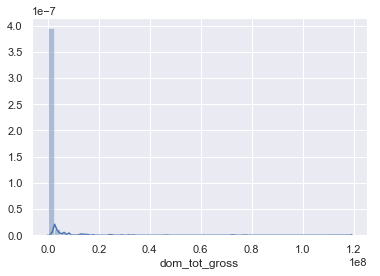

In [389]:
# plt.hist(bom_df['dom_tot_gross'])
sns.distplot(bom_df['dom_tot_gross'])
bom_df['dom_tot_gross'].describe()

In [6]:
sns.distplot(bom_df_merged['dom_tot_gross'])

NameError: name 'sns' is not defined

In [2]:
test = bom_df[bom_df['dom_tot_gross'] > 1.511425e+04]
test = test[test['dom_tot_gross'] < 2.465102e+05]

NameError: name 'bom_df' is not defined

In [3]:
bom_df.shape, test.shape

NameError: name 'bom_df' is not defined

In [432]:
bom_df_merged.head()

movie_name  dom_tot_gross                        dist  \
0                      fired!         5661.0  International Film Circuit   
1                     cool it        62713.0        Roadside Attractions   
2        new york in the 50's        11882.0                      Avatar   
3  who does she think she is?         3081.0            Artistic License   
4              last days here         7643.0                         IFC   

    release_date_bom        genre         runtime   rating  prod_budget_bom  \
0   February 2, 2007  Documentary  1 hrs. 11 min.  Unrated              NaN   
1  November 12, 2010  Documentary  1 hrs. 28 min.       PG              NaN   
2   February 9, 2001  Documentary  1 hrs. 12 min.  Unrated              NaN   
3   October 17, 2008  Documentary  1 hrs. 13 min.  Unrated              NaN   
4      March 2, 2012  Documentary  1 hrs. 31 min.  Unrated              NaN   

   is_holiday  runtime_3   ...    PG  PG-13  R  Unrated  Animation  Concert  \
0       False         71   ...     0      0  0        1          0        0   
1       False         88   ...     1      0  0        0          0        0   
2       False         72   ...     0      0  0        1          0        0   
3       False         73   ...     0      0  0        1          0        0   
4       False         91   ...     0      0  0        1          0        0   

   Documentary  Foreign  Thriller  Unknown  
0            1        0         0        0  
1            1        0         0        0  
2            1        0         0        0  
3            1        0         0        0  
4            1        0         0        0  

[5 rows x 27 columns]

In [548]:
# Let's pickle this dataset
with open('bom_df_for_model.pkl', 'wb') as f:
    pickle.dump(bom_df_merged, f)

In [549]:
with open('tn_df.pkl', 'wb') as f:
    pickle.dump(tn_df, f)

In [566]:
bom_df_merged.head()
bom_df.head()
# ['prod_budget'].count()

movie_name  dom_tot_gross  \
0                                   slither      7802450.0   
1                                 the relic     33956608.0   
4                         strictly business      7683267.0   
5  the hobbit:the battle of the five armies    255119788.0   
7                       how he fell in love        17575.0   

                      dist release_date            genre         runtime  \
0                Universal   2006-03-31    Sci-Fi Horror  1 hrs. 36 min.   
1                Paramount   1997-01-10           Horror  1 hrs. 49 min.   
4             Warner Bros.   1991-11-08  Romantic Comedy  1 hrs. 23 min.   
5  Warner Bros. (New Line)   2014-12-17          Fantasy  2 hrs. 24 min.   
7           Orion Pictures   2016-07-08          Romance  1 hrs. 47 min.   

    rating  prod_budget  is_holiday runtime_1  runtime_3  \
0        R         15.0       False      1:36         96   
1        R          NaN       False      1:49        109   
4    PG-13          NaN       False      1:23         83   
5    PG-13          NaN       False      2:24        144   
7  Unrated          NaN       False      1:47        107   

                                         alt  
0                                    slither  
1                                  the relic  
4                                       None  
5  the hobbit: the battle of the five armies  
7                        how to fall in love

In [445]:
tn_df.head()

release_date                                   movie_name  prod_budget  \
0   2009-12-18                                       avatar    425000000   
1   2011-05-20  pirates of the caribbean: on stranger tides    410600000   
2   2015-05-01                      avengers: age of ultron    330600000   
3   2017-12-15            star wars ep. viii: the last jedi    317000000   
4   2015-12-18         star wars ep. vii: the force awakens    306000000   

   domestic_gross  worldwide_gross  
0       760507625       2776345279  
1       241063875       1045663875  
2       459005868       1403013963  
3       620181382       1316764784  
4       936662225       2053311220

In [550]:
# mylist = ['a', 'b', 'd', 'e']
# my_df = my_df[columns = mylist]
import difflib


In [574]:
def mymatch(x):
    a = difflib.get_close_matches(x,tn_df.movie_name, cutoff=.8)
    if a:
        return a[0]
    else:
        return "None"

In [575]:
bom_df['alt'] = bom_df.movie_name.apply(mymatch)

In [576]:
bom_df.head()

movie_name  dom_tot_gross  \
0                                   slither      7802450.0   
1                                 the relic     33956608.0   
4                         strictly business      7683267.0   
5  the hobbit:the battle of the five armies    255119788.0   
7                       how he fell in love        17575.0   

                      dist release_date            genre         runtime  \
0                Universal   2006-03-31    Sci-Fi Horror  1 hrs. 36 min.   
1                Paramount   1997-01-10           Horror  1 hrs. 49 min.   
4             Warner Bros.   1991-11-08  Romantic Comedy  1 hrs. 23 min.   
5  Warner Bros. (New Line)   2014-12-17          Fantasy  2 hrs. 24 min.   
7           Orion Pictures   2016-07-08          Romance  1 hrs. 47 min.   

    rating  prod_budget  is_holiday runtime_1  runtime_3  \
0        R         15.0       False      1:36         96   
1        R          NaN       False      1:49        109   
4    PG-13          NaN       False      1:23         83   
5    PG-13          NaN       False      2:24        144   
7  Unrated          NaN       False      1:47        107   

                                         alt  
0                                    slither  
1                                  the relic  
4                                       None  
5  the hobbit: the battle of the five armies  
7                        how to fall in love

In [577]:
bom_df_merged = bom_df.merge(tn_df, how='left', \
                             left_on='alt', right_on='movie_name', \
                             suffixes=('_bom', '_tn'))

In [622]:
bom_df_merged['prod_budget_bom'] = bom_df_merged['prod_budget_bom'] * 1000000

In [623]:
bom_df_merged['prod_budget_tn'].count()

864

In [643]:
def chooseProdBudget(firstBudgetVal, secondBudgetVal):
    if firstBudgetVal > 0:
        return pd.to_numeric(firstBudgetVal)
    else:
        return secondBudgetVal

In [644]:
chooseProdBudget(15, np.nan)

15

In [645]:
bom_df_merged['newcol'] = (bom_df_merged.apply(lambda x: \
                            chooseProdBudget(x['prod_budget_bom'],
                                             x['prod_budget_tn']), axis=1))
                           
                           

In [646]:
type(bom_df_merged.newcol[1])

numpy.float64

In [648]:
bom_df_merged['newcol'].count()

923

In [662]:
bom_df_merged_pb = bom_df_merged[ bom_df_merged['newcol'] > 0 ]

In [663]:
bom_df_merged_pb.count()

movie_name_bom      923
dom_tot_gross       922
dist                923
release_date_bom    922
genre               923
runtime             923
rating              923
prod_budget_bom     614
is_holiday          923
runtime_1           923
runtime_3           923
alt                 923
release_date_tn     864
movie_name_tn       864
prod_budget_tn      864
domestic_gross      864
worldwide_gross     864
newcol              923
dtype: int64

In [664]:
with open('bom_df_for_model.pkl', 'wb') as f:
    pickle.dump(bom_df_merged_pb, f)

In [665]:
bom_df_merged_pb.head()

movie_name_bom  dom_tot_gross  \
0                                   slither      7802450.0   
1                                 the relic     33956608.0   
3  the hobbit:the battle of the five armies    255119788.0   
4                       how he fell in love        17575.0   
5                               jackass 3-d    117229692.0   

                      dist release_date_bom          genre         runtime  \
0                Universal       2006-03-31  Sci-Fi Horror  1 hrs. 36 min.   
1                Paramount       1997-01-10         Horror  1 hrs. 49 min.   
3  Warner Bros. (New Line)       2014-12-17        Fantasy  2 hrs. 24 min.   
4           Orion Pictures       2016-07-08        Romance  1 hrs. 47 min.   
5                Paramount       2010-10-15         Comedy  1 hrs. 34 min.   

    rating  prod_budget_bom  is_holiday runtime_1  runtime_3  \
0        R       15000000.0       False      1:36         96   
1        R              NaN       False      1:49        109   
3    PG-13              NaN       False      2:24        144   
4  Unrated              NaN       False      1:47        107   
5        R       20000000.0       False      1:34         94   

                                         alt release_date_tn  \
0                                    slither      2006-03-31   
1                                  the relic      1997-01-10   
3  the hobbit: the battle of the five armies      2014-12-17   
4                        how to fall in love      2012-12-31   
5                                 jackass 3d      2010-10-15   

                               movie_name_tn  prod_budget_tn  domestic_gross  \
0                                    slither      15250000.0       7802450.0   
1                                  the relic      60000000.0      33956608.0   
3  the hobbit: the battle of the five armies     250000000.0     255119788.0   
4                        how to fall in love       4000000.0             0.0   
5                                 jackass 3d      20000000.0     117229692.0   

   worldwide_gross       newcol  
0       12930343.0   15000000.0  
1       33956608.0   60000000.0  
3      945577621.0  250000000.0  
4              0.0    4000000.0  
5      171685793.0   20000000.0